In [1]:
import pandas as pd
data = pd.read_csv("D:/Data Science/codebasics/insurance.csv")
data[:5]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [6]:
data['sex'] = data['sex'].map({'female':0, 'male':1})

In [7]:
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})

In [8]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
data['region'] = data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [11]:
x = data.drop(['charges', 'region'],axis=1)
y = data['charges']

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
sv = SVR()
sv.fit(xtrain, ytrain)
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
gb = GradientBoostingRegressor()
gb.fit(xtrain, ytrain)

GradientBoostingRegressor()

In [15]:
ypred1 = lr.predict(xtest)
ypred2 = sv.predict(xtest)
ypred3 = rf.predict(xtest)
ypred4 = gb.predict(xtest)

In [16]:
data1 = pd.DataFrame({'Actual': ytest, 'lr': ypred1, 'sv':ypred2, 'rf':ypred3, 'gb':ypred4})
data1

,Actual,lr,sv,rf,gb
764,9095.06825,8554.817116,9546.725504,10775.658531,10427.990349
887,5272.17580,6973.587467,9487.935664,5493.214352,5878.929609
890,29330.98315,36798.604161,9651.574870,28314.736836,27846.773368
1293,9301.89355,9417.882823,9553.932765,9525.672660,9613.279761
259,33750.29180,26871.680311,9413.992629,34363.907403,33859.024038
...,...,...,...,...,...
109,47055.53210,39220.995889,9651.905055,47039.100044,45476.088187
575,12222.89830,11695.634124,9627.798040,12706.683687,12407.271814
535,6067.12675,7253.598675,9500.111686,5717.227714,6417.948132
543,63770.42801,40950.539904,9605.947203,46864.153795,48274.630065


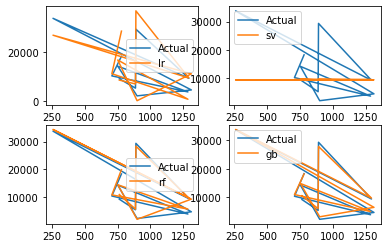

In [17]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(data1['Actual'].iloc[:11], label='Actual')
plt.plot(data1['lr'].iloc[:11], label='lr')
plt.legend()

plt.subplot(222)
plt.plot(data1['Actual'].iloc[:11], label='Actual')
plt.plot(data1['sv'].iloc[:11], label='sv')
plt.legend()

plt.subplot(223)
plt.plot(data1['Actual'].iloc[:11], label='Actual')
plt.plot(data1['rf'].iloc[:11], label='rf')
plt.legend()

plt.subplot(224)
plt.plot(data1['Actual'].iloc[:11], label='Actual')
plt.plot(data1['gb'].iloc[:11], label='gb')

plt.legend()

In [18]:
from sklearn import metrics
score1 = metrics.r2_score(ytest, ypred1)
score2 = metrics.r2_score(ytest, ypred2)
score3 = metrics.r2_score(ytest, ypred3)
score4 = metrics.r2_score(ytest, ypred4)
print(score1, score2, score3, score4)

0.7811302113434097 -0.07222971234901521 0.8538236678782026 0.8785240976380629


In [19]:
s1 = metrics.mean_absolute_error(ytest, ypred1)
s2 = metrics.mean_absolute_error(ytest, ypred2)
s3 = metrics.mean_absolute_error(ytest, ypred3)
s4 = metrics.mean_absolute_error(ytest, ypred4)
print(s1,s2,s3,s4)

4213.484797807138 8590.133628716292 2564.095668439149 2424.226884995501


In [20]:
df = {'age':40,
       'sex':1,
       'bmi':30,
       'children':3,
       'smoker':1
#        'region':2
}

data2 = pd.DataFrame(df, index=[0])
data2

,age,sex,bmi,children,smoker
0,40,1,30,3,1


In [21]:
new_pred = gb.predict(data2)
new_pred

array([36024.0454976])

In [22]:
import joblib
gr = GradientBoostingRegressor()
gr.fit(xtrain,ytrain)
joblib.dump(gr, 'insurance_predictor')

['insurance_predictor']

In [23]:
mode = joblib.load('insurance_predictor')
mode.predict(data2)

array([36024.0454976])

In [24]:
def result1():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
#     p6 = float(e6.get())
    
    model = joblib.load('insurance_predictor')
    result = model.predict([[p1,p2,p3,p4,p5]])
    
    tk.Label(master, text="Insurence Cost").grid(row=8)
    
    tk.Label(master, text=result).grid(row=8, column=1)

import joblib
import tkinter as tk
master = tk.Tk()
master.title("Insurance cost prediction")

label = tk.Label(master, text="Insurenace cost prediction", bg='black', fg='white').grid(row=0, columnspan=2)

tk.Label(master, text = "Enter your Age : ").grid(row=1)
tk.Label(master, text = "Male or Female [1/0] : ").grid(row=2)
tk.Label(master, text = "Enter your BMI value : ").grid(row=3)
tk.Label(master, text = "Enter your Num of Children : ").grid(row=4)
tk.Label(master, text = "Smoker or not [1/0] : ").grid(row=5)
# tk.Label(master, text = "Region [1-4] : ").grid(row=6)

e1 = tk.Entry(master)
e1.grid(row=1, column=1)
e2 = tk.Entry(master)
e2.grid(row=2, column=1)
e3 = tk.Entry(master)
e3.grid(row=3, column=1)
e4 = tk.Entry(master)
e4.grid(row=4, column=1)
e5 = tk.Entry(master)
e5.grid(row=5, column=1)
# e6 = tk.Entry(master)
# e6.grid(row=6, column=1)


tk.Button(master, text="Predict", command=result1).grid()

tk.mainloop()